In this post, we'll use data from a tensile test to build a stress strain curve with Python and Matplotlib.

A tensile test is a type of mechanical test performed by engineers in order to determine the mechanical properties of a material. Engineering metal alloys such as steel and aluminum alloys are tensile tested in order to determine their strength and stiffness. Tensile tests are performed in a piece of equipment called a mechanical test frame.

![instron]({static}/code/matplotlib_plots/stress_strain_curves/images/instron.jpg)

After a tensile test is complete, a set of data is produced by the mechanical test frame. Using the data acquired during a tensile test, a stress-strain curve can be produced. 

In this post, we will create a stress-strain curve (a plot) from a set of tensile test data of a steel 1045 sample and an aluminum 6061 sample. The stress strain curve we construct will have the following features:

 * A descriptive title
 * Axes labels with units
 * Two lines on the same plot. One line for steel 1045 and one line for aluminum 6061
 * A legend

## Install Python

We are going to build our stress strain curve with Python and a Jupyter notebook. I suggest engineers and problem-solvers download and install the [Anaconda distribution of Python](https://anaconda.com). See [this post]({filename}/posts/installation/installing_anaconda_on_windows.md) to learn how to install Anaconda on your computer. Alternatively, you can download Python form [Python.org](https://python.org) or download Python the Microsoft Store.

## Install Jupyter, NumPy, Pandas, and Matplotlib

Once Python is installed, the next thing we need to do is install a couple of Python packages. If you are using the Anaconda distribution of Python, the packages we are going to use to build the plot: Jupyter, NumPy, Pandas, and Matplotlib come pre-installed and no additional installation steps are necessary. 

However, if you downloaded Python from Python.org or installed Python using the Microsoft Store, you will need to install install Jupyter, NumPy, Pandas, and Matplotlib separately.  You can install Jupyter, NumPy, Pandas, and Matplotlib with pip (the Python package manager) or install theses four packages with the Anaconda Prompt.

If you are using a terminal and pip, type:

```text
> pip install jupyter numpy pandas matplotlib 
```

If you have Anaconda installed and use the Anaconda Prompt, type:

```text
> conda install jupyter numpy pandas matplotlib 
```

## Open a Jupyter notebook

We will construct our stress strain curve using a Jupyter notebook. See [this post]({filename}/posts/jupyter/opening_jupyter_notebook.md) to see how to open a Jupyter notebook. 

Make sure to save your Jupyter notebook with a recognizable name.

## Download the data and move the data into the same folder as the Jupyter notebook

Next, we need to download the two data files that we will use to build our stress-strain curve. You can download sample data using the links below:

[aluminum6061.xls](https://github.com/ProfessorKazarinoff/staticsite/raw/master/content/code/matplotlib_plots/stress_strain_curves/aluminum6061.xls)

[steel1045.xls](https://github.com/ProfessorKazarinoff/staticsite/raw/master/content/code/matplotlib_plots/stress_strain_curves/steel1045.xls)

After these .xls files are downloaded, both .xls files need to be moved into the same folder as our Jupyter notebook.

## Import NumPy, Pandas, and Matplotlib

Now that our Jupyter notebook is open and the two .xls data files are in the same folder as the Jupyter notebook, we can start coding and build our plot.

At the top of the Jupyter notebook, import NumPy, Pandas and Matplotlib. The command ```%matplotlib inline``` is included so that our plot will display directly inside our Jupyter notebook. If you are using a .py file instead of a Jupyter notebook, make sure to comment out ```%matplotlib inline``` as this line is not valid Python code.
            
We will also print out the versions of our NumPy and Pandas packages using the ```.__version__``` attribute. If the versions of NumPy and Pandas prints out, that means that NumPy and Pandas are installed and we can use these packages in our code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print("NumPy version:",np.__version__)
print("Pandas version:",pd.__version__)

NumPy version: 1.16.2
Pandas version: 0.24.2


## Ensure the two .xls data files are in the same folder as the Jupyter notebook

Before we proceed, let's make sure the two .xls data files are in the same folder as our running Jupyter notebook. We'll use a Jupyter notebook magic command to print out the contents of the folder that our notebook is in. The ```%ls``` command lists the contents of the current folder.

In [2]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is A048-4C53

 Directory of C:\Users\peter.kazarinoff\Documents\staticsite\content\code\matplotlib_plots\stress_strain_curves

05/20/2019  12:10 PM    <DIR>          .
05/20/2019  12:10 PM    <DIR>          ..
05/20/2019  11:37 AM    <DIR>          .ipynb_checkpoints
05/13/2019  01:59 PM            36,864 aluminum6061.xls
05/20/2019  11:20 AM    <DIR>          images
05/13/2019  02:09 PM            38,912 steel1045.xls
05/20/2019  12:10 PM            44,973 stress_strain_curve_with_inset.png
05/20/2019  12:10 PM           110,135 stress_strain_curve_with_inset_elastic_region.ipynb
05/20/2019  12:10 PM            86,683 stress_strain_curve_with_python.ipynb
05/20/2019  11:20 AM           113,319 stress-strain_curve.png
               6 File(s)        430,886 bytes
               4 Dir(s)  91,015,548,928 bytes free


We can see our Jupyter notebook ```stress_strain_curve_with_python.ipynb``` as well as the two .xls data files ```aluminum6061.xls``` and ```steel1045.xls``` are in our current folder. 

Now that we are sure the two .xls data files are in the same folder as our notebook, we can import the data in the two two .xls files using Panda's ```pd.read_excel()``` function. The data from the two excel files will be stores in two Pandas dataframes called ```steel_df``` and ```al_df```.

In [3]:
steel_df = pd.read_excel("aluminum6061.xls")
al_df = pd.read_excel("steel1045.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


We can use Pandas ```.head()``` method to view the first five rows of each dataframe. 

In [4]:
steel_df.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,761,1,6.532,0.01524,201.158508,0.018893,-0.023081,NaN,NaN,NaN
1,761,2,6.702,0.01600,205.978119,0.000265,-0.013024,NaN,NaN,NaN
2,761,3,7.098,0.01720,219.295441,-0.000877,-0.024879,NaN,NaN,NaN
3,761,4,8.697,0.02350,268.505890,0.001453,-0.006798,NaN,NaN,NaN
4,761,5,10.196,0.03004,322.028168,0.001865,0.012563,NaN,NaN,NaN


In [5]:
al_df.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,762,1,5.969,0.01284,201.030792,0.001572,-0.007133,NaN,NaN,NaN
1,762,2,6.242,0.01392,215.235886,0.000009,-0.014581,NaN,NaN,NaN
2,762,3,6.936,0.01646,246.816742,-0.000832,0.006942,NaN,NaN,NaN
3,762,4,8.632,0.02340,371.870361,0.002203,0.000776,NaN,NaN,NaN
4,762,5,10.533,0.03110,502.501862,0.001481,0.018102,NaN,NaN,NaN


We see a number of columns in each dataframe. The columns we are interested in are **FORCE**, **EXT**, and **CH5**. Below is a description of what these columns mean.

 * **FORCE** Force measurements from the load cell in pounds (lb)
 * **EXT** Extension measurements from the mechanical extensometer in percent (%), strain in percent
 * **CH5** Extension readings from the laser extensometer in percent (%), strain in percent

# Create stress and strain series from the **FORCE**, **EXT**, and **CH5** columns

Next we'll create a four Pandas series from the ```['CH5']``` and ```['FORCE']``` columns of our ```al_df``` and ```steel_df``` dataframes. The equations below show how to calculate stress, $\sigma$, and strain, $\epsilon$, from force $F$ and cross-sectional area $A$. Cross-sectional area $A$ is the formula for the area of a circle. For the steel and aluminum samples we tested, the diameter $d$ was $0.506 \ in$.

$$ \sigma = \frac{F}{A_0} $$

$$ F \ (kip) = F \ (lb) \times 0.001 $$

$$ A_0 = \pi (d/2)^2 $$

$$ d = 0.506 \ in $$

$$ \epsilon \ (unitless) = \epsilon \ (\%) \times 0.01 $$

In [6]:
strain_al = al_df['CH5']*0.01
d_al = 0.506
stress_al = (al_df['FORCE']*0.001)/(np.pi*((d_al/2)**2))

strain_steel = steel_df['CH5']*0.01
d_steel = 0.506
stress_steel = (steel_df['FORCE']*0.001)/(np.pi*((d_steel/2)**2))

# Build a quick plot

Now that we have the data from the tensile test in four series, we can build a quick plot using Matplotlib's ```plt.plot()``` method. The first x,y pair we pass to ```plt.plot()``` is ```strain_al,stress_al``` and the second x,y pair we pass in is ```strain_steel,stress_steel```. The command ```plt.show()``` shows the plot.

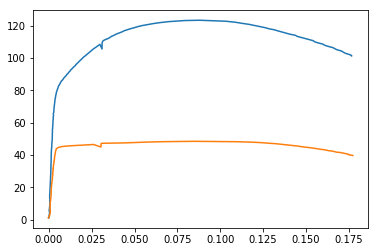

In [7]:
plt.plot(strain_al,stress_al,strain_steel,stress_steel)
plt.show()

We see a plot with two lines. One line represents the aluminum sample and one line represents the steel sample. We can improve our plot by adding axis labels with units, a title and a legend.

## Add axis labels, title and a legend

Axis labels, titles and a legend are added to our plot with three Matplotlib methods. The methods are summarized in the table below.

| Matplotlib method | description | example |
| --- | --- | --- |
| ```plt.xlabel()``` | x-axis label | ```plt.xlabel('strain (in/in')``` |
| ```plt.xlabel()``` | y-axis label | ```plt.ylabel('stress (ksi)``` |
| ```plt.title()``` | plot title | ```plt.title('Stress Strain Curve')``` |
| ```plt.legend()``` | legend | ```plt.legend(['aluminum','steel'])``` |

The code cell below shows these four methods in action and produces a plot.

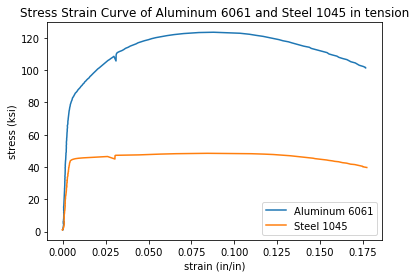

In [8]:
plt.plot(strain_al,stress_al,strain_steel,stress_steel)
plt.xlabel('strain (in/in)')
plt.ylabel('stress (ksi)')
plt.title('Stress Strain Curve of Aluminum 6061 and Steel 1045 in tension')
plt.legend(['Aluminum 6061','Steel 1045'])
plt.show()

The plot we see has two lines, axis labels, a title and a legend. Next we'll save the plot to a .png image file.

## Save the plot as a .png image
 
Now we can save the plot as a .png image using Matplotlib's ```plt.savefig()``` method. The code cell below builds the plot and saves an image file called ```stress-strain_curve.png```. The argument ```dpi=300``` inside of Matplotlib's ```plt.savefig()``` method specifies the resolution of our saved image. The image ```stress-strain_curve.png``` will be saved in the same folder as our running Jupyter notebook.

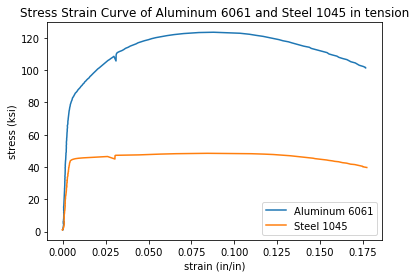

In [9]:
plt.plot(strain_al,stress_al,strain_steel,stress_steel)
plt.xlabel('strain (in/in)')
plt.ylabel('stress (ksi)')
plt.title('Stress Strain Curve of Aluminum 6061 and Steel 1045 in tension')
plt.legend(['Aluminum 6061','Steel 1045'])
plt.savefig('stress-strain_curve.png', dpi=300, bbox_inches='tight')
plt.show()

Our complete stress strain curve contains two lines, one for steel and one for aluminum. The plot has axis labels with units, a title and a legend. A copy of the plot is now saved as ```stress-strain_curve.png``` in the same folder as our Jupyter notebook.

## Summary

In this post, we built a stress strain curve using Python. First we installed Python and made sure that NumPy, Pandas, Matplotlib and Jupyter were installed. Next we opened a Jupyter notebook and moved our .xls data files into the same folder as the Jupyter notebook. Inside the Jupyter notebook we entered code into a couple different code cells. 

In the first Jupyter notebook code cell, we imported NumPy, Pandas, and Matplotlib and printed our their versions. In the next code cell, we saved the data from two .xls data files into two Pandas dataframes. In the third code cell, we created Pandas series for stress and strain from the columns in the dataframes. In the final code cell we built our stress strain curve with Matplotlib and saved the plot to a .png image file.